## 사전 데이터 설정

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
# 데이터 불러오기
cifar10 = keras.datasets.cifar10

In [36]:
# train과 test로 분리하기
(train_input, train_target), (test_input, test_target) = cifar10.load_data()

In [37]:
# 데이터 크기 확인하기
print("훈련 데이터 크기  : ", train_input.shape, train_target.shape)
print("테스트 데이터 크기: ", test_input.shape, test_target.shape)

훈련 데이터 크기  :  (50000, 32, 32, 3) (50000, 1)
테스트 데이터 크기:  (10000, 32, 32, 3) (10000, 1)


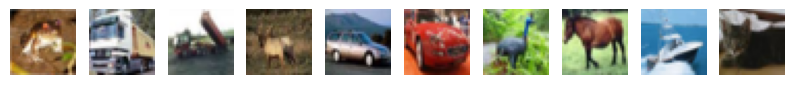

In [38]:
# 데이터 샘플 10개 확인해보기
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [39]:
# 10개의 훈련 데이터의 타깃값 확인하기
print([train_target[i][0] for i in range(10)])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


In [40]:
# 각 항목 별 개수 확인하기
import numpy as np

print("각 항목 별 개수 : ", np.unique(train_target, return_counts=True))

각 항목 별 개수 :  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


In [41]:
# 검증 데이터 설정
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2)

In [42]:
# 데이터 크기 확인하기
print("훈련 데이터 크기: ", train_input.shape, train_target.shape)
print("테스트 데이터 크기: ", test_input.shape, test_target.shape)
print("검증 데이터 크기: ", val_input.shape, val_target.shape)

훈련 데이터 크기:  (40000, 32, 32, 3) (40000, 1)
테스트 데이터 크기:  (10000, 32, 32, 3) (10000, 1)
검증 데이터 크기:  (10000, 32, 32, 3) (10000, 1)


## 데이터 정규화

In [43]:
# 픽셀값 0~1로 설정
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0
val_scaled = val_input / 255.0

In [44]:
print("훈련 0번: ", np.min(train_scaled[0]), np.max(train_scaled[0]))
print("훈련 1번: ", np.min(train_scaled[1]), np.max(train_scaled[1]))

훈련 0번:  0.19607843137254902 1.0
훈련 1번:  0.011764705882352941 0.9882352941176471


## 모델 정의

In [45]:
# 객체 생성
model = keras.Sequential()

In [46]:
# 합성곱 층 추가
# (32,32,3) --필터32개--> (32,32,32)
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                            padding='same', input_shape=(32,32,3)))

# (2,2) 최대풀링
# (32,32,32) --(2,2)풀링--> (16,16,32)
model.add(keras.layers.MaxPooling2D(2))

In [47]:
# 두번째 합성곱 층 추가
# (16,16,32) --필터64개--> (16,16,64)
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                            padding='same'))

# (2,2) 최대풀링
# (16,16,64) --(2,2)풀링--> (8,8,64)
model.add(keras.layers.MaxPooling2D(2))

In [48]:
# 세번째 합성곱 층 추가
# (8,8,64) --필터128개--> (8,8,128)
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',
                            padding='same'))

# (2,2) 최대풀링
# (8,8,128) --(2,2)풀링--> (4,4,128)
model.add(keras.layers.MaxPooling2D(2))

In [49]:
# Flatten 층 추가
model.add(keras.layers.Flatten())

# 밀집층 추가
model.add(keras.layers.Dense(128, activation='relu'))

# 드롭아웃 추가
# 드롭아웃 통해 과대적합 막아 성능 개선
model.add(keras.layers.Dropout(0.4))

# 두번째 밀집층 추가
# 클래스 개수(10개)와 동일한 출력층
model.add(keras.layers.Dense(10, activation='softmax'))

In [50]:
#모델 구조
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

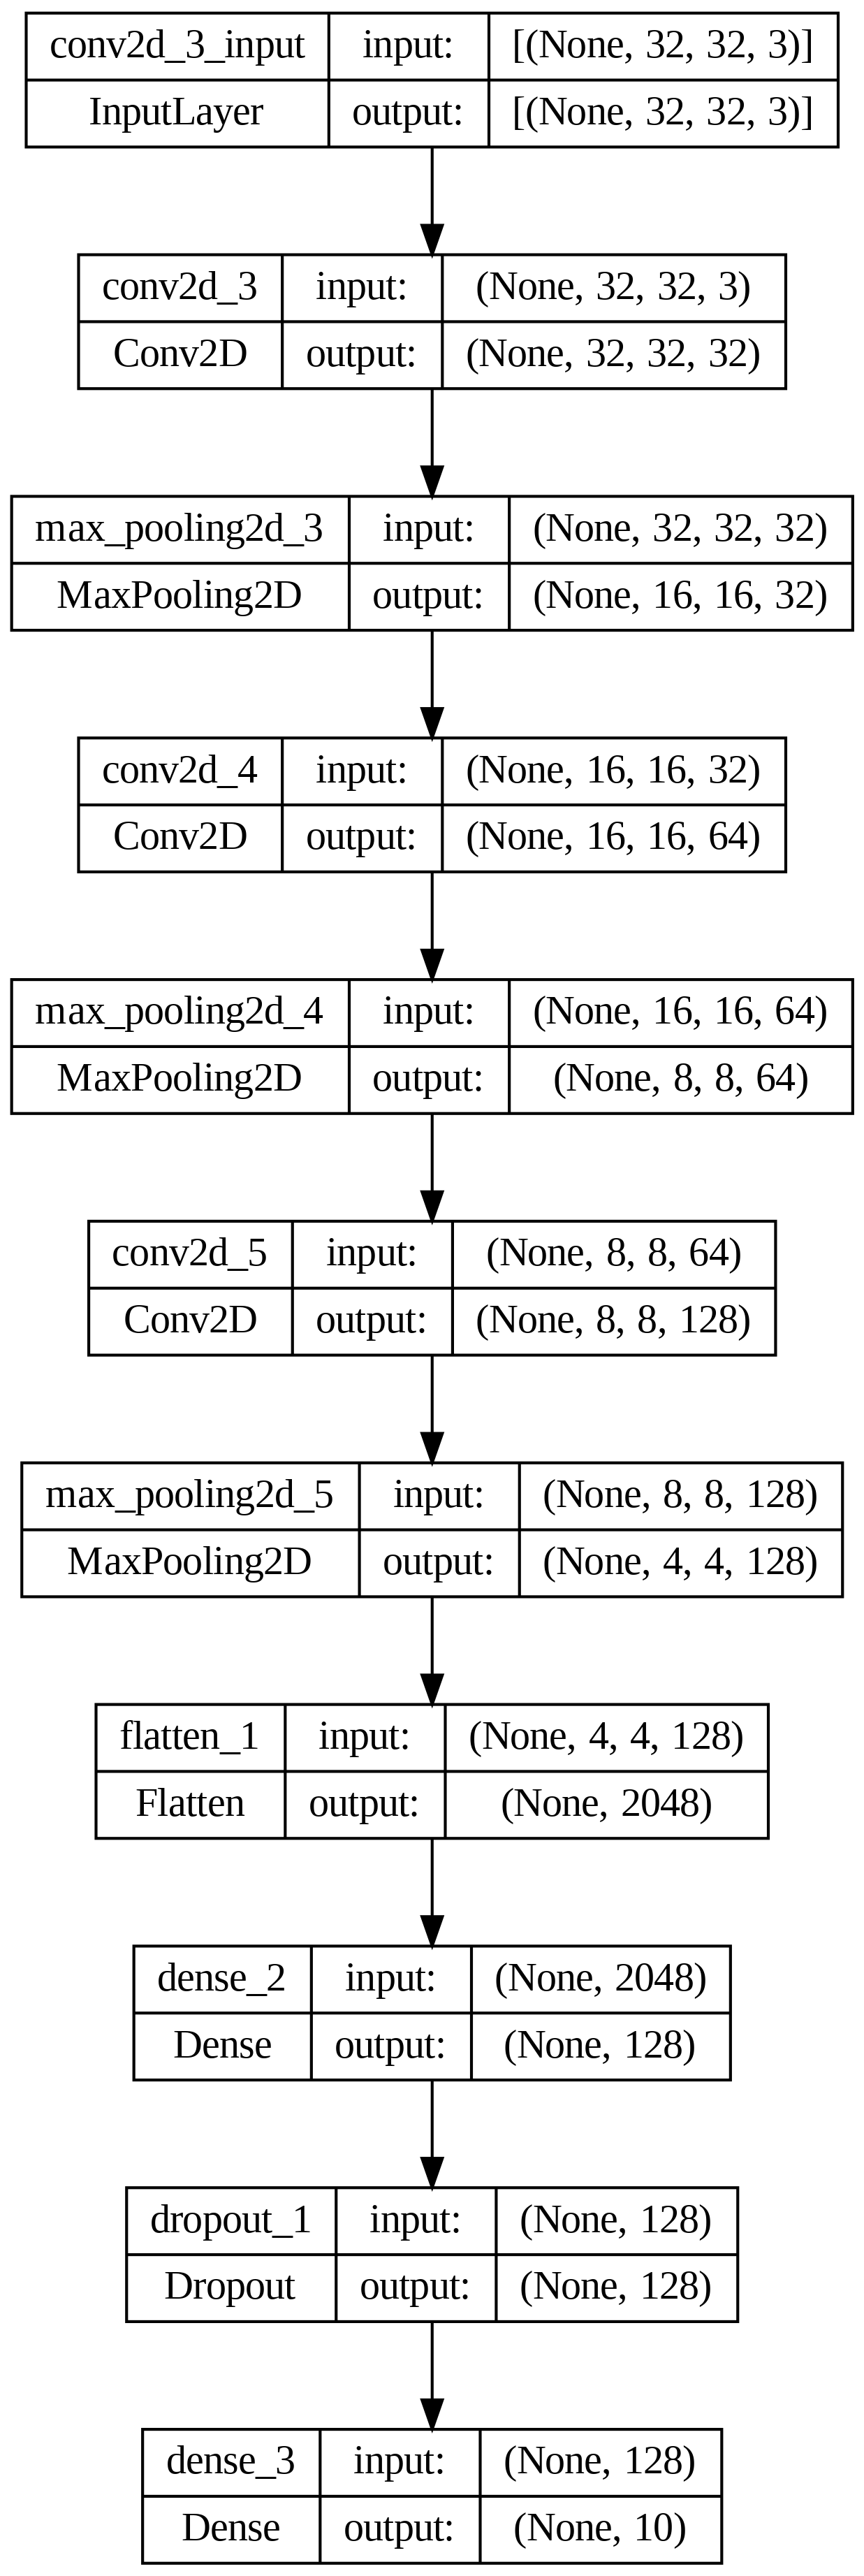

In [51]:
# 구조 시각화
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-model.png', dpi=300)

## 모델 컴파일

In [52]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
            metrics='accuracy')

In [53]:
# 콜백 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                restore_best_weights=True)

# 훈련 & 히스토리에 객체에 전달
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1250/1250 [==============================] - 8s 5ms/step - loss: 1.6446 - accuracy: 0.3918 - val_loss: 1.3238 - val_accuracy: 0.5279
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2417 - accuracy: 0.5574 - val_loss: 1.0797 - val_accuracy: 0.6164
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0628 - accuracy: 0.6259 - val_loss: 0.9527 - val_accuracy: 0.6707
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9426 - accuracy: 0.6679 - val_loss: 0.9155 - val_accuracy: 0.6864
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8584 - accuracy: 0.6986 - val_loss: 0.8798 - val_accuracy: 0.6958
Epoch 6/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7904 - accuracy: 0.7229 - val_loss: 0.8805 - val_accuracy: 0.7034
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7302 - accuracy: 0.7420 - val_loss: 0.8209 - val_accuracy:

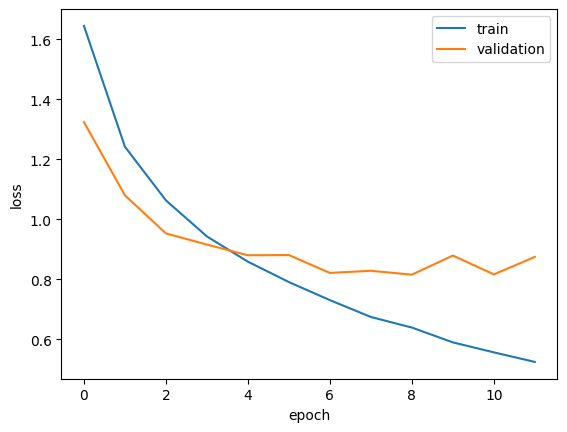

In [54]:
# 조기종료 확인 - 손실곡선
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

## 모델 성능 확인

In [55]:
# 최적의 모델 파라미터의 성능 검증 데이터로 확인
model.evaluate(val_scaled, val_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.8152 - accuracy: 0.7309


[0.8151608109474182, 0.73089998960495]

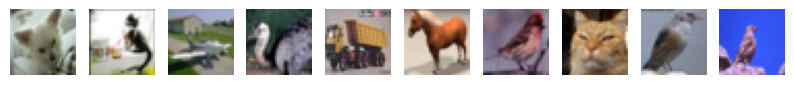

In [59]:
# 10개 이미지 확인
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(val_scaled[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [60]:
# 모델 활용해서 10개 이미지 예측
preds = []
label = ['비행기', '자동차', '새', '고양이', '사슴',
        '개', '개구리', '말', '배', '트럭']

for i in range(10):
  pred = model.predict(val_scaled[i:i+1])
  preds.append(label[np.argmax(pred)])
print(preds)

1/1 [==============================] - 0s 19ms/step
['고양이', '고양이', '비행기', '개', '트럭', '말', '새', '고양이', '새', '새']


## 최종 성능 측정

In [58]:
# 테스트 데이터로 최종 성능 확인
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.8108 - accuracy: 0.7260


[0.8108088970184326, 0.7260000109672546]